round
0     0.45
1     0.25
2     0.35
3     0.40
4     0.45
      ... 
95    0.25
96    0.60
97    0.30
98    0.45
99    0.55
Name: move, Length: 100, dtype: float64


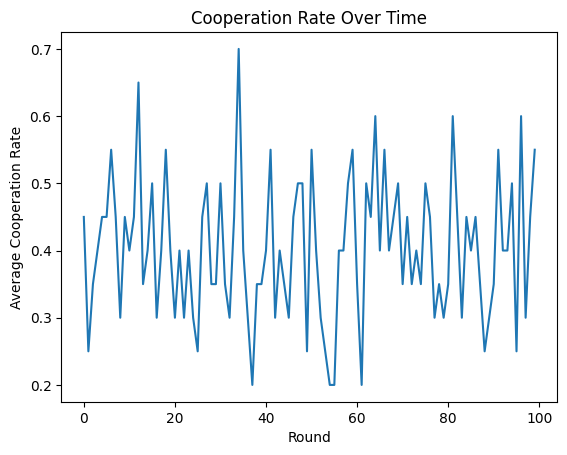

      round  agent_id       move    payoff  q_cooperate  q_defect
14        0        14     defect  1.421053     3.952153  7.587912
15        0        15     defect  1.000000     3.656689  7.802250
16        0        16     defect  1.210526     4.210482  7.232464
17        0        17     defect  1.210526     4.273937  7.736265
19        0        19     defect  1.421053     3.694141  7.090747
...     ...       ...        ...       ...          ...       ...
1994     99        14     defect  1.210526     3.952153  7.587912
1995     99        15  cooperate  0.315789     3.656689  7.802250
1996     99        16  cooperate  0.315789     4.210482  7.232464
1997     99        17     defect  1.210526     4.273937  7.736265
1999     99        19     defect  1.421053     3.694141  7.090747

[500 rows x 6 columns]
       q_cooperate  q_defect
round                       
0          3.95748  7.489927
1          3.95748  7.489927
2          3.95748  7.489927
3          3.95748  7.489927
4         

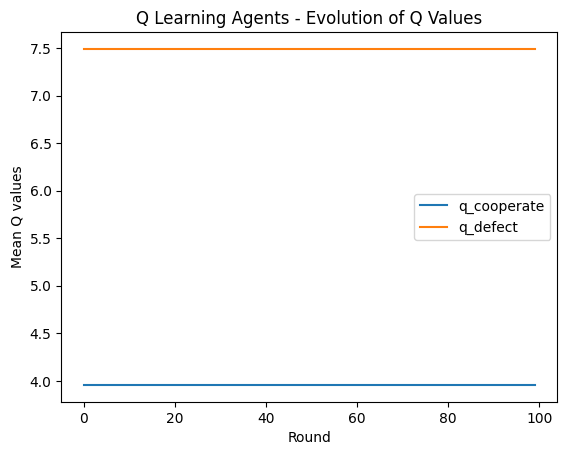

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("simulation_results.csv")

# Example: Calculate average cooperation rate over time.
avg_coop_rate = df.groupby("round")["move"].apply(lambda x: (x == "cooperate").mean())
print(avg_coop_rate)

# Example: Plot average cooperation rate.
plt.plot(avg_coop_rate.index, avg_coop_rate.values)
plt.xlabel("Round")
plt.ylabel("Average Cooperation Rate")
plt.title("Cooperation Rate Over Time")
plt.show()

# Example: filter to get all data of q_learning agents:
q_learning_agents = df[df["q_cooperate"].notna()]
print(q_learning_agents)

# Example: calculate the mean q_values, per round, of the q_learning agents
mean_q_values_per_round = q_learning_agents.groupby("round")[["q_cooperate", "q_defect"]].mean()
print(mean_q_values_per_round)

# Example: plot it
plt.plot(mean_q_values_per_round.index, mean_q_values_per_round["q_cooperate"], label = "q_cooperate")
plt.plot(mean_q_values_per_round.index, mean_q_values_per_round["q_defect"], label = "q_defect")
plt.xlabel("Round")
plt.ylabel("Mean Q values")
plt.title("Q Learning Agents - Evolution of Q Values")
plt.legend()
plt.show()